In [2]:
import pandas as pd
import numpy as np

first_10_directors = pd.read_csv("top_10_directors.csv")
first_10_directors

,Director,Lifetime Gross
0,James Cameron,7508707001
1,"Anthony Russo, Joe Russo",6721322058
2,Peter Jackson,5928027449
3,David Yates,5727642948
4,Christopher Nolan,4637621544
5,Steven Spielberg,4524389849
6,Michael Bay,4379286781
7,Jon Watts,3933942258
8,Sam Raimi,3466250724
9,George Lucas,3324653253


In [9]:
top_200 = pd.read_csv("top_200.csv")

In [22]:
import requests
import pandas as pd

# Function to fetch movie details from OMDB API
def get_movie_details(movie_title):
    url = f'http://www.omdbapi.com/?apikey={api_key}&type=movie&r=json&t='
    response = requests.get(url + movie_title)
    if response.status_code == 200:
        return response.json()
    else:
        return None

# Assuming top_200 is your DataFrame containing the movie names of the top 200 movies of all time

# Initialize an empty list to store movie details
movie_details = []

# Iterate over each movie in the top_200 DataFrame
for movie_title in top_200['Title']:
    # Fetch movie details for the movie
    movie = get_movie_details(movie_title)
    if movie:
        # Check if the director of the movie is in the list of top 10 directors
        director = movie.get('Director', '')
        if director in first_10_directors['Director'].values:
            # If the director is in the top 10 directors, append movie details to the list
            movie_details.append(movie)

# Initialize empty lists to store ratings
rotten_tomatoes_ratings = []
metacritic_ratings = []
imdb_ratings = []

# Iterate over each movie detail
for movie in movie_details:
    # Extract ratings from the 'Ratings' sub JSON
    ratings = movie.get('Ratings', [])
    # Initialize ratings variables to None
    rotten_tomatoes = None
    metacritic = None
    imdb = None
    # Iterate over each rating
    for rating in ratings:
        if rating['Source'] == 'Rotten Tomatoes':
            rotten_tomatoes = rating['Value']
        elif rating['Source'] == 'Metacritic':
            metacritic = rating['Value']
        elif rating['Source'] == 'Internet Movie Database':
            imdb = rating['Value']
    # Append the extracted ratings to respective lists
    rotten_tomatoes_ratings.append(rotten_tomatoes)
    metacritic_ratings.append(metacritic)
    imdb_ratings.append(imdb)

# Create a new DataFrame with movie ratings
movie_ratings_df = pd.DataFrame({
    'Director': [movie.get('Director') for movie in movie_details],
    'Movie': [movie.get('Title') for movie in movie_details],
    'Rotten Tomatoes': rotten_tomatoes_ratings,
    'Metacritic': metacritic_ratings,
    'IMDb': imdb_ratings
})

# Display the new DataFrame
movie_ratings_df

,Director,Movie,Rotten Tomatoes,Metacritic,IMDb
0,James Cameron,Avatar,82%,83/100,7.9/10
1,"Anthony Russo, Joe Russo",Avengers: Endgame,94%,78/100,8.4/10
2,James Cameron,Avatar: The Way of Water,76%,67/100,7.6/10
3,James Cameron,Titanic,88%,75/100,7.9/10
4,"Anthony Russo, Joe Russo",Avengers: Infinity War,85%,68/100,8.4/10
5,Jon Watts,Spider-Man: No Way Home,93%,71/100,8.2/10
6,David Yates,Harry Potter and the Deathly Hallows: Part 2,96%,85/100,8.1/10
7,Peter Jackson,The Lord of the Rings: The Return of the King,94%,94/100,9.0/10
8,"Anthony Russo, Joe Russo",Captain America: Civil War,91%,75/100,7.8/10
9,Jon Watts,Spider-Man: Far from Home,91%,69/100,7.4/10


In [25]:
converted_movie_ratings = movie_ratings_df

converted_movie_ratings.head()

,Director,Movie,Rotten Tomatoes,Metacritic,IMDb
0,James Cameron,Avatar,82%,83/100,7.9/10
1,"Anthony Russo, Joe Russo",Avengers: Endgame,94%,78/100,8.4/10
2,James Cameron,Avatar: The Way of Water,76%,67/100,7.6/10
3,James Cameron,Titanic,88%,75/100,7.9/10
4,"Anthony Russo, Joe Russo",Avengers: Infinity War,85%,68/100,8.4/10


In [26]:
# Define a function to convert scores to integers
def convert_score(score):
    try:
        if '%' in score:
            return int(score.replace('%', ''))
        elif '/' in score:
            parts = score.split('/')
            if '.' in parts[0]:  # Check if score contains a decimal
                return int(float(parts[0]) * 10)  # Convert float to int (e.g., 7.9 to 79)
            else:
                return int(parts[0])
        else:
            return int(score)
    except (TypeError, ValueError):
        # Log or handle the error appropriately
        return None

# Convert scores for each column
converted_movie_ratings = movie_ratings_df.copy()  # Create a copy to avoid modifying original DataFrame
for col in ['Rotten Tomatoes', 'Metacritic', 'IMDb']:
    converted_movie_ratings[col] = converted_movie_ratings[col].apply(convert_score)

# Display the updated DataFrame
converted_movie_ratings

,Director,Movie,Rotten Tomatoes,Metacritic,IMDb
0,James Cameron,Avatar,82,83,79
1,"Anthony Russo, Joe Russo",Avengers: Endgame,94,78,84
2,James Cameron,Avatar: The Way of Water,76,67,76
3,James Cameron,Titanic,88,75,79
4,"Anthony Russo, Joe Russo",Avengers: Infinity War,85,68,84
5,Jon Watts,Spider-Man: No Way Home,93,71,82
6,David Yates,Harry Potter and the Deathly Hallows: Part 2,96,85,81
7,Peter Jackson,The Lord of the Rings: The Return of the King,94,94,90
8,"Anthony Russo, Joe Russo",Captain America: Civil War,91,75,78
9,Jon Watts,Spider-Man: Far from Home,91,69,74


In [28]:
# Calculate the average score for each director
avg_scores = converted_movie_ratings.groupby('Director').mean()

avg_scores

/private/tmp/PKInstallSandbox.VTjnys/tmp/ipykernel_43310/3370685629.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_scores = converted_movie_ratings.groupby('Director').mean()


,Rotten Tomatoes,Metacritic,IMDb
Director,,,
"Anthony Russo, Joe Russo",90.000000,72.750000,80.750000
Christopher Nolan,86.800000,79.600000,86.400000
David Yates,74.166667,69.500000,74.333333
George Lucas,72.250000,65.750000,73.250000
James Cameron,82.000000,75.000000,78.000000
Jon Watts,92.000000,71.000000,76.666667
Michael Bay,29.200000,39.400000,60.000000
Peter Jackson,79.666667,76.000000,82.833333
Sam Raimi,79.750000,68.750000,70.250000


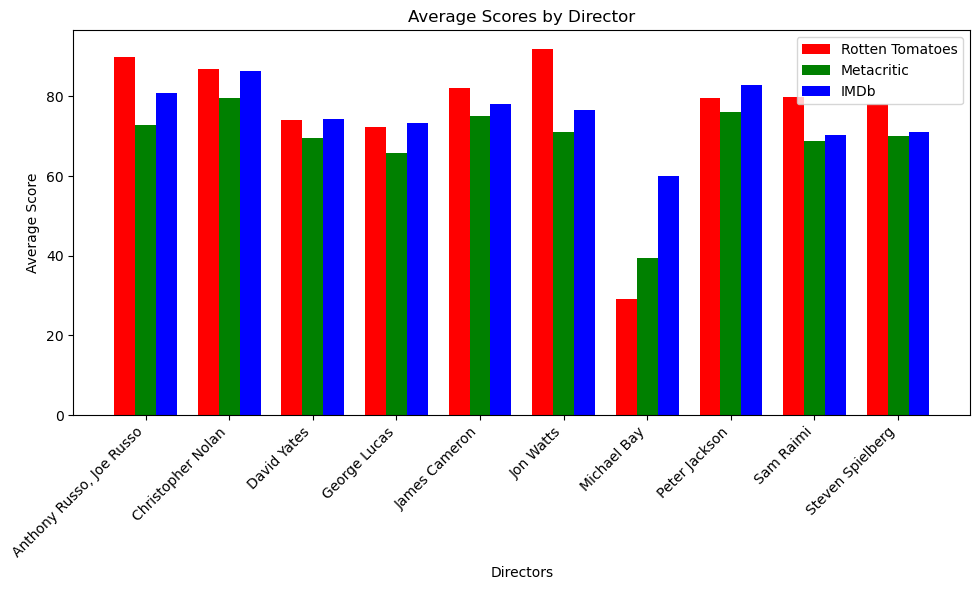

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Get directors and average scores
directors = avg_scores.index
rotten_tomatoes_scores = avg_scores['Rotten Tomatoes']
metacritic_scores = avg_scores['Metacritic']
imdb_scores = avg_scores['IMDb']

bar_width = 0.25
index = range(len(directors))

# Plot each bar
plt.bar(index, rotten_tomatoes_scores, color='r', width=bar_width, label='Rotten Tomatoes')
plt.bar([i + bar_width for i in index], metacritic_scores, color='g', width=bar_width, label='Metacritic')
plt.bar([i + 2 * bar_width for i in index], imdb_scores, color='b', width=bar_width, label='IMDb')

plt.xlabel('Directors')
plt.ylabel('Average Score')
plt.title('Average Scores by Director')
plt.xticks([i + bar_width for i in index], directors, rotation=45, ha='right') 
plt.legend()

plt.tight_layout()
plt.show()

### DataFrame with essencial data and information sorted

In [34]:
merged_df = pd.merge(avg_scores, first_10_directors, on='Director')
sorted_merged_df = merged_df.sort_values(by='Lifetime Gross', ascending=False)
sorted_merged_df

,Director,Rotten Tomatoes,Metacritic,IMDb,Lifetime Gross
4,James Cameron,82.000000,75.000000,78.000000,7508707001
0,"Anthony Russo, Joe Russo",90.000000,72.750000,80.750000,6721322058
7,Peter Jackson,79.666667,76.000000,82.833333,5928027449
2,David Yates,74.166667,69.500000,74.333333,5727642948
1,Christopher Nolan,86.800000,79.600000,86.400000,4637621544
9,Steven Spielberg,78.166667,70.166667,71.166667,4524389849
6,Michael Bay,29.200000,39.400000,60.000000,4379286781
5,Jon Watts,92.000000,71.000000,76.666667,3933942258
8,Sam Raimi,79.750000,68.750000,70.250000,3466250724
3,George Lucas,72.250000,65.750000,73.250000,3324653253


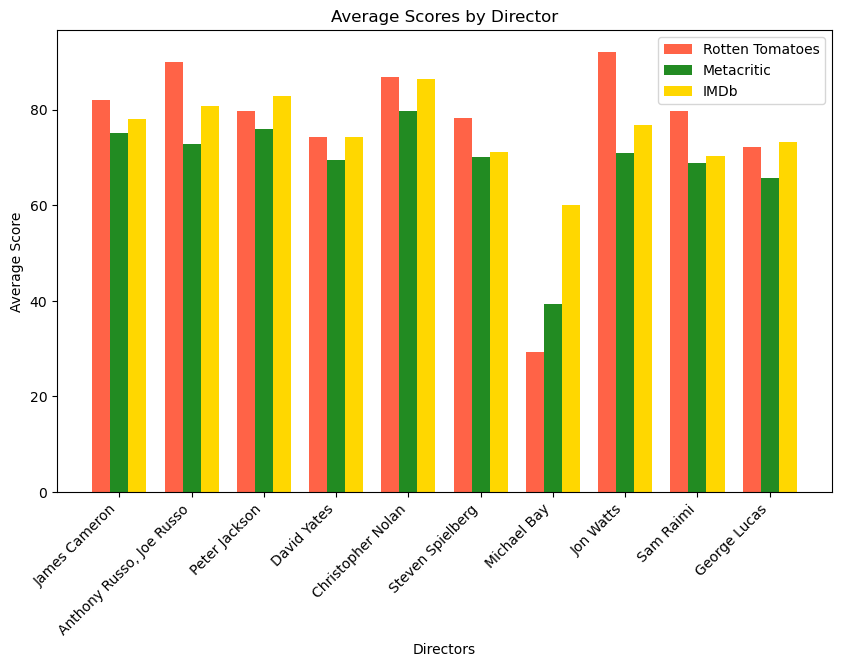

In [62]:
plt.figure(figsize=(10, 6))

# Get directors and average scores
directors = sorted_merged_df['Director']
rotten_tomatoes_scores = sorted_merged_df['Rotten Tomatoes']
metacritic_scores = sorted_merged_df['Metacritic']
imdb_scores = sorted_merged_df['IMDb']

bar_width = 0.25
index = range(len(directors))

# Plot each bar
plt.bar(index, rotten_tomatoes_scores, color='tomato', width=bar_width, label='Rotten Tomatoes')
plt.bar([i + bar_width for i in index], metacritic_scores, color='forestgreen', width=bar_width, label='Metacritic')
plt.bar([i + 2 * bar_width for i in index], imdb_scores, color='gold', width=bar_width, label='IMDb')

plt.xlabel('Directors')
plt.ylabel('Average Score')
plt.title('Average Scores by Director')
plt.xticks([i + bar_width for i in index], directors, rotation=45, ha='right') 
plt.legend()

plt.savefig('Avg_scores_by_director.png')


plt.show()

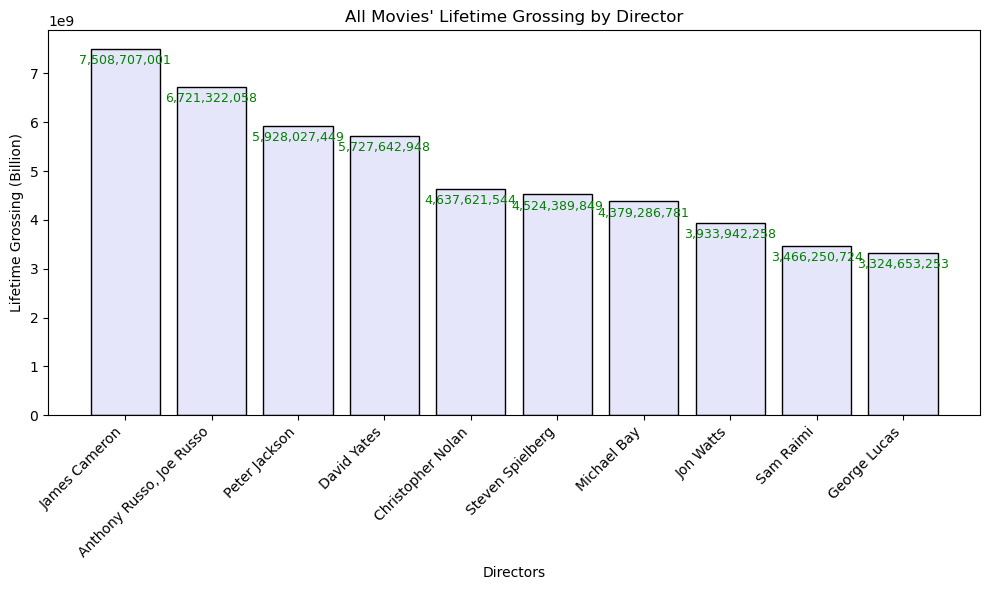

In [61]:
names = first_10_directors['Director']
money = first_10_directors['Lifetime Gross']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(names, money, color = 'lavender', edgecolor = 'black')

# Adding total number inside each bar
for bar, gross in zip(bars, money):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05 * max(money), f'{gross:,}', 
             ha='center', va='bottom', fontsize=9, color = 'green')

plt.xlabel('Directors')
plt.ylabel('Lifetime Grossing (Billion)')
plt.title("All Movies' Lifetime Grossing by Director")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('All_movies_life_gross_director.png')


plt.show()